In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

db = pd.read_csv('НД-без-пополнения.csv')
x = db.loc[:,'Electronegativity':'Exposure dose (ug/mL)'].values
y = db.loc[:,'Viability (%)'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, min_samples_leaf=1, criterion='absolute_error')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y1_pred = regressor.predict(x_train)

Q2: -8.01302246794872
r2_test: 0.64168839501835
MAE_test: 8.518161616161617
MSE_test: 121.8485565050506
RMSE_test: 11.03850336345696
r2_train: 0.8911319349601414
MAE_train: 4.725416455696203
MSE_train: 48.14053399556961
RMSE_train: 6.938337985106347


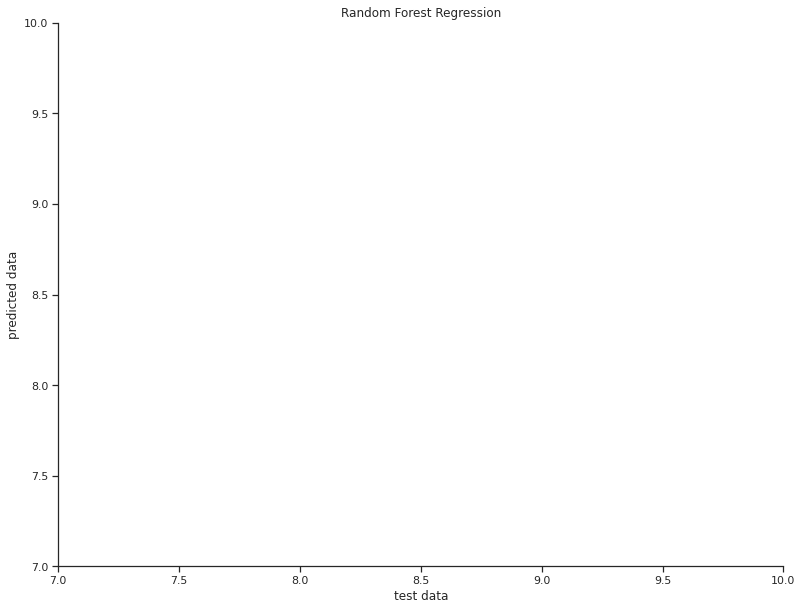

In [38]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                           scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#DD7059', s=70)
plt.scatter(y_test, y_pred, color='#569FC9',s=70)
plt.plot(y_test, y_test, color='gray')
plt.title('Random Forest Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(7, 10)
plt.ylim(7, 10)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

Q2: -0.03927279364439058
r2_test: 0.6524155271905261
MAE_test: 0.03337432240573029
MSE_test: 0.0029495997239538416
RMSE_test: 0.054310217491314115
r2_train: 0.7303314023203872
MAE_train: 0.022905029139563195
MSE_train: 0.0016328433058201974
RMSE_train: 0.040408455870277915


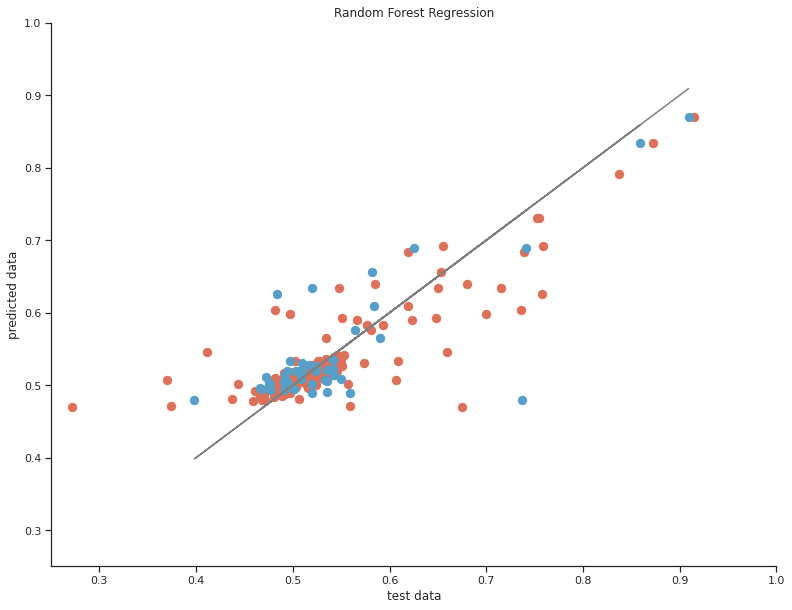

In [ ]:
def rfr_model(x, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(x, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
    scores = cross_val_score(rfr, x, y, cv=10, 
                             scoring='neg_mean_absolute_error')

    return scores
    predictions = cross_val_predict(rfr, x, y, cv=10)
    ccuracy = cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                           scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#DD7059', s=70)
plt.scatter(y_test, y_pred, color='#569FC9',s=70)
plt.plot(y_test, y_test, color='gray')
plt.title('Random Forest Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(0.25, 1)
plt.ylim(0.25, 1)
plt.show()